In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:

mushroom_df = pd.read_csv('mushrooms.csv') #reads csv file
mushroom_df = mushroom_df.dropna() #drop null values

print(mushroom_df.shape)
print(list(mushroom_df.columns))

(8124, 23)
['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [4]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#class- e, edible(1) p, poisonous(0)
mushroom_df['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [6]:
mushroom_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

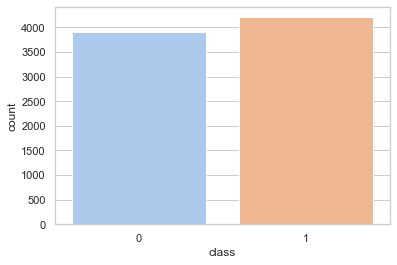

<Figure size 432x288 with 0 Axes>

In [46]:
#bar graph of class values
sns.countplot(x='class', data=mushroom_df, palette='pastel')
plt.show()
plt.savefig('count_plot')

In [13]:
total = len(mushroom_df[mushroom_df['class']=='e']) + len(mushroom_df[mushroom_df['class']=='p'])
edible = round(len(mushroom_df[mushroom_df['class']=='e']) / total, 2)
poisonous = round(len(mushroom_df[mushroom_df['class']=='p']) / total, 2)
print("The percentage of edible mushrooms is {} and the percentage of poisonous mushrooms is {}".format(edible_percentage, poisonous_percentage))

In [23]:
print("The percentage of edible mushrooms is {} and the percentage of poisonous mushrooms is {}".format(edible_percentage, poisonous_percentage))

0.52
0.48
The percentage of edible mushrooms is 0.52 and the percentage of poisonous mushrooms is 0.48


In [19]:
# Create an empty list for the feature data set 'X' and the target data set 'y'
feature_set = mushroom_df.drop(columns=['class'])
target_set = mushroom_df['class']

In [33]:
#data preprocessing
dont_change = ["class"]
change_cols = list(set(mushroom_df.columns) - set(dont_change))
mushroom_df = pd.get_dummies(mushroom_df, columns=change_cols)
mushroom_df.head()

#e - edible (1)
#p - poisonous (0)
mushroom_df['class'] = mushroom_df['class'].replace('e', 1)
mushroom_df['class'] = mushroom_df['class'].replace('p', 0)


,class,spore-print-color_r_1_0_0_0_1_1_0,spore-print-color_r_1_0_0_0_1_1_1,stalk-shape_e_1_0_1_1_0_1_0,stalk-shape_e_1_0_1_1_0_1_1,population_v_1_0_0_1_0_0_0,population_v_1_0_0_1_0_0_1,population_v_0_0_1_1_0_0_0,population_v_0_0_1_1_0_0_1,stalk-color-below-ring_y_0_1_0_0_0_0_0,...,habitat_g_1_1_1_0_1_1_0,habitat_g_1_1_1_0_1_1_1,gill-size_n_1_1_0_0_1_1_0,gill-size_n_1_1_0_0_1_1_1,gill-color_y_1_1_1_0_1_1_0,gill-color_y_1_1_1_0_1_1_1,stalk-shape_t_0_0_0_0_0_0_0,stalk-shape_t_0_0_0_0_0_0_1,cap-color_e_1_0_0_0_0_1_0,cap-color_e_1_0_0_0_0_1_1
0,0,0,1,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0
1,1,0,1,0,1,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
2,1,0,1,0,1,1,0,1,0,0,...,0,1,1,0,0,1,1,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0
4,1,0,1,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0


In [34]:
# Shuffle data
mushroom_df = mushroom_df.sample(frac=1)
mushroom_df.head()

,class,spore-print-color_r_1_0_0_0_1_1_0,spore-print-color_r_1_0_0_0_1_1_1,stalk-shape_e_1_0_1_1_0_1_0,stalk-shape_e_1_0_1_1_0_1_1,population_v_1_0_0_1_0_0_0,population_v_1_0_0_1_0_0_1,population_v_0_0_1_1_0_0_0,population_v_0_0_1_1_0_0_1,stalk-color-below-ring_y_0_1_0_0_0_0_0,...,habitat_g_1_1_1_0_1_1_0,habitat_g_1_1_1_0_1_1_1,gill-size_n_1_1_0_0_1_1_0,gill-size_n_1_1_0_0_1_1_1,gill-color_y_1_1_1_0_1_1_0,gill-color_y_1_1_1_0_1_1_1,stalk-shape_t_0_0_0_0_0_0_0,stalk-shape_t_0_0_0_0_0_0_1,cap-color_e_1_0_0_0_0_1_0,cap-color_e_1_0_0_0_0_1_1
4315,0,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
5329,0,0,1,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
6201,0,0,1,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
494,1,0,1,0,1,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
2540,0,0,1,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,1,0


In [58]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(50)

#test dataset
X = mushroom_df.drop(columns=['class'])
y = mushroom_df['class']

#split dataset into training sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [76]:
#KNC model
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
#accuracy score
accuracy = knc.score(X_test, y_test)

In [60]:
#make predictions
predict_y = knc.predict(X_test)

print(f"Predicted values: {predict_y[:10]}" )
print(f"Actual values are: {np.array(y_test[:10])}")

Predicted values: [0 0 1 0 1 1 0 1 0 1]
Actual values are: [0 0 1 0 1 1 0 1 0 1]


In [65]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
cm = confusion_matrix(y_test, predict_y)
cm

array([[772,   0],
       [  0, 853]])

/Users/shavonnelin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


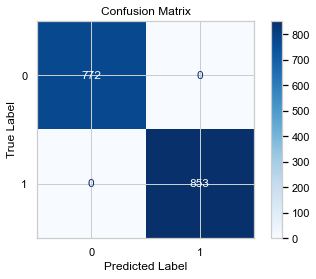

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      1.00      1.00       853

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [68]:
#plotting confusion matrix
color = 'black'
matrix = plot_confusion_matrix(knc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#classification report
print(classification_report(y_test, predict_y))

In [75]:
print(f"The KNeighborsClassifier model has a {knc.score(X_test, y_test) * 100}% accuracy.")

The KNeighborsClassifier has a 100.0% accuracy
